# 1 Basic Linear Correlation

                 room  Occupancy  Sound Level
room         1.000000   0.189192     0.507432
Occupancy    0.189192   1.000000     0.117652
Sound Level  0.507432   0.117652     1.000000


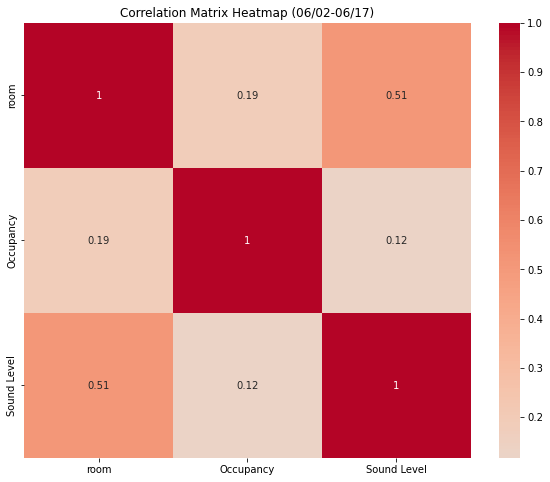

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("merged_data_filled_qian.csv", header=0, parse_dates=[0], index_col=0)

# 更改列名
df = df.rename(columns={"count_1s": "Occupancy", "Value": "Sound Level"})

# 计算每个变量之间的相关性
correlation_matrix = df.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap (06/02-06/17)')
plt.savefig('Pearson_06.png')
plt.show()


                 room  Occupancy  Sound Level
room         1.000000   0.156260     0.406831
Occupancy    0.156260   1.000000     0.103349
Sound Level  0.406831   0.103349     1.000000


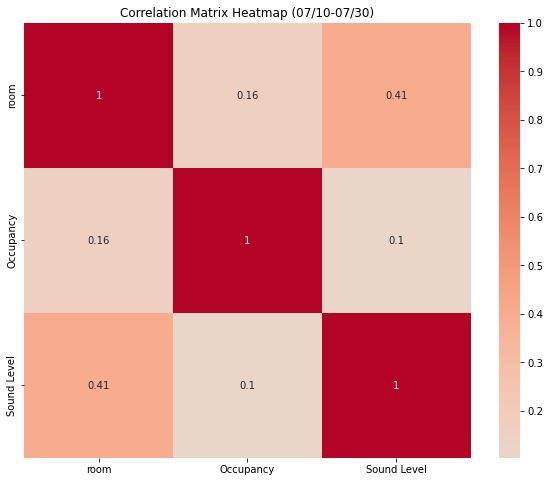

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("merged_data_filled_zhong.csv", header=0, parse_dates=[0], index_col=0)

# 更改列名
df = df.rename(columns={"count_1s": "Occupancy", "Value": "Sound Level"})

# 计算每个变量之间的相关性
correlation_matrix = df.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap (07/10-07/30)')
plt.savefig('Pearson_07.png')
plt.show()


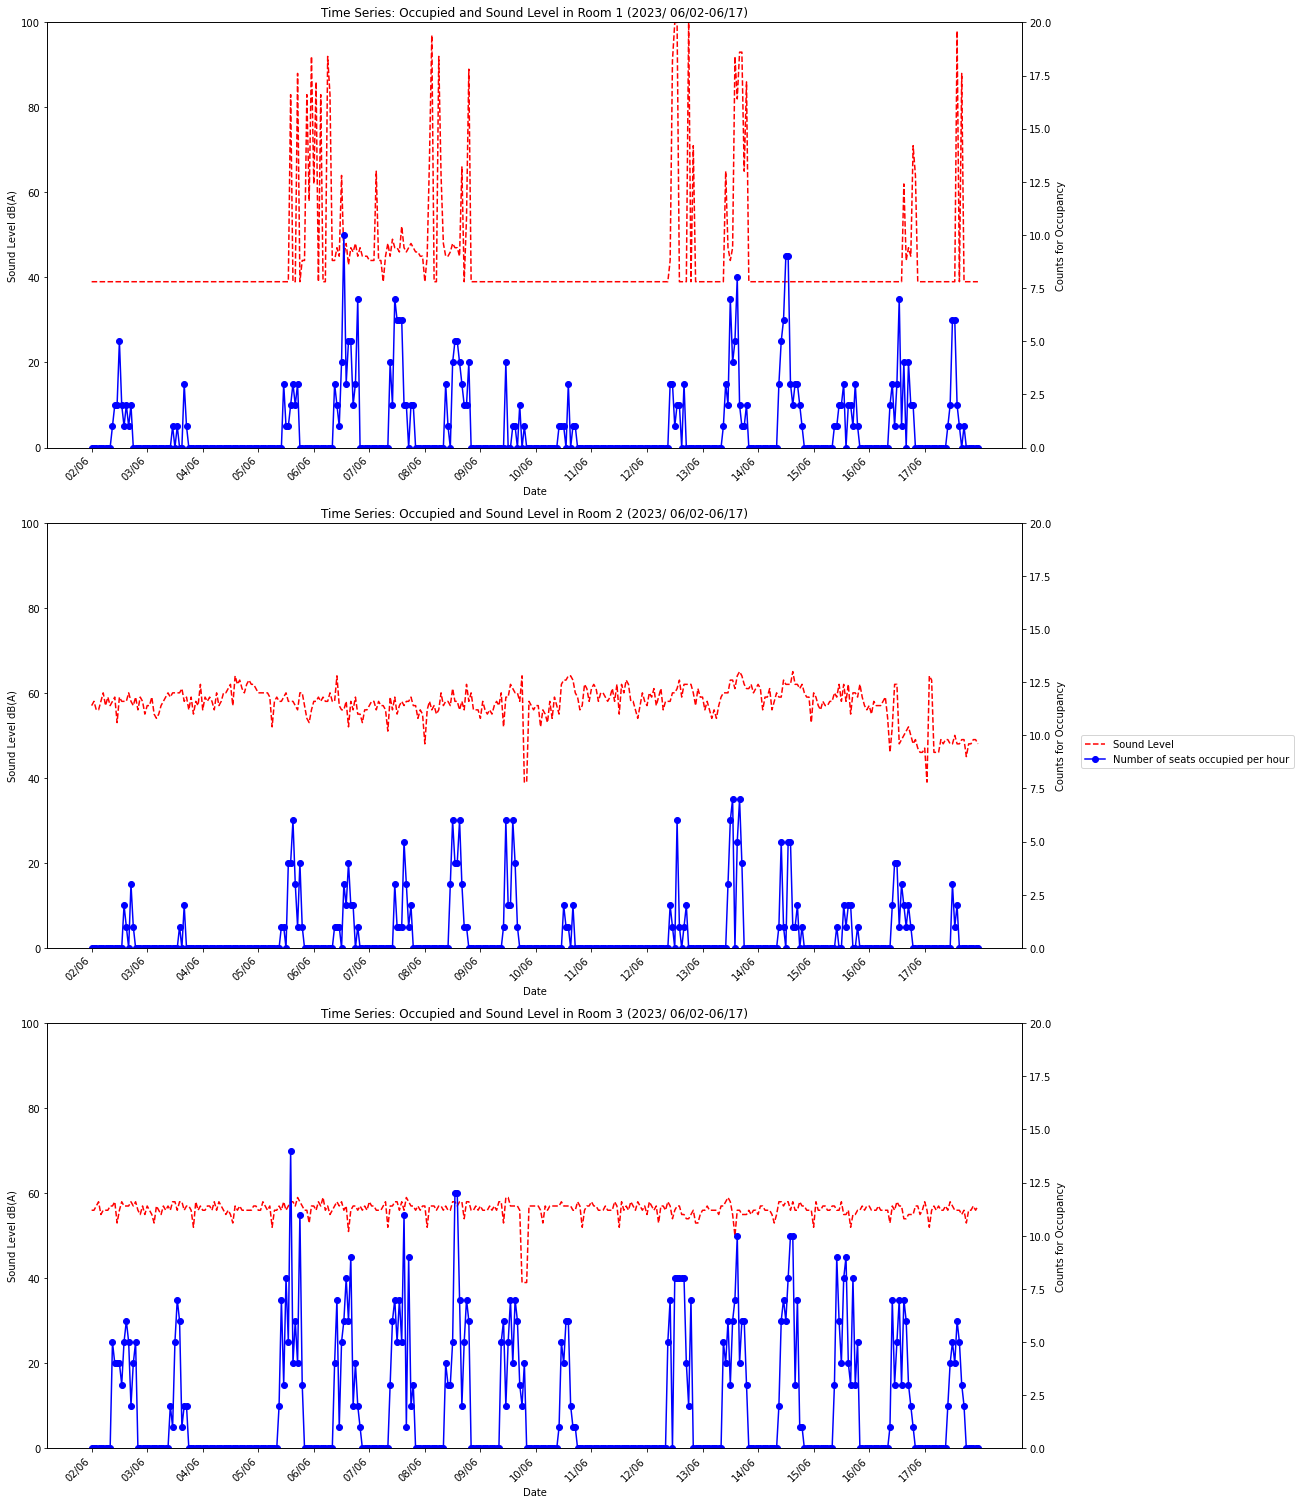

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件
data = pd.read_csv("merged_data_filled_qian.csv")

# 将 'date' 列转化为时间格式，并指定正确的格式
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# 按 'date' 列排序，确保数据是按时间顺序排列的
data = data.sort_values(by='date')

# 设置房间顺序
rooms = [1, 2, 3]

# 创建主图
fig = plt.figure(figsize=(15, 7 * len(rooms)))

# 为每个房间创建一个子图
for idx, room in enumerate(rooms, 1):
    room_data = data[data['room'] == room]
    
    # 计算x轴刻度
    x_ticks = room_data['date'][::24]  # 每24个时间点显示一个
    x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]

    # 创建子图
    ax = fig.add_subplot(len(rooms), 1, idx)

    # 设置左边y轴
    ax.set_ylabel("Sound Level dB(A)")
    ax.set_ylim(0, 100)
    ax.plot(room_data['date'], room_data['Value'], label='Sound Level', color='red', linestyle='--')

    # 设置右边y轴
    ax2 = ax.twinx()
    ax2.plot(room_data['date'], room_data['count_1s'], label='Number of seats occupied per hour', color='blue', marker='o')
    ax2.set_ylabel("Counts for Occupancy")
    ax2.set_ylim(0, 20)

    # 设置子图的标题和轴标签
    ax.set_title(f"Time Series: Occupied and Sound Level in Room {room} (2023/ 06/02-06/17)")
    ax.set_xlabel("Date")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')

# 调整子图的间距
plt.subplots_adjust(hspace=0.8)

# 创建图例
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = fig.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('Time Series: Occupied and Sound Level in Room_qian.png', bbox_extra_artists=(legend,), bbox_inches='tight')

# 显示图形
plt.show()





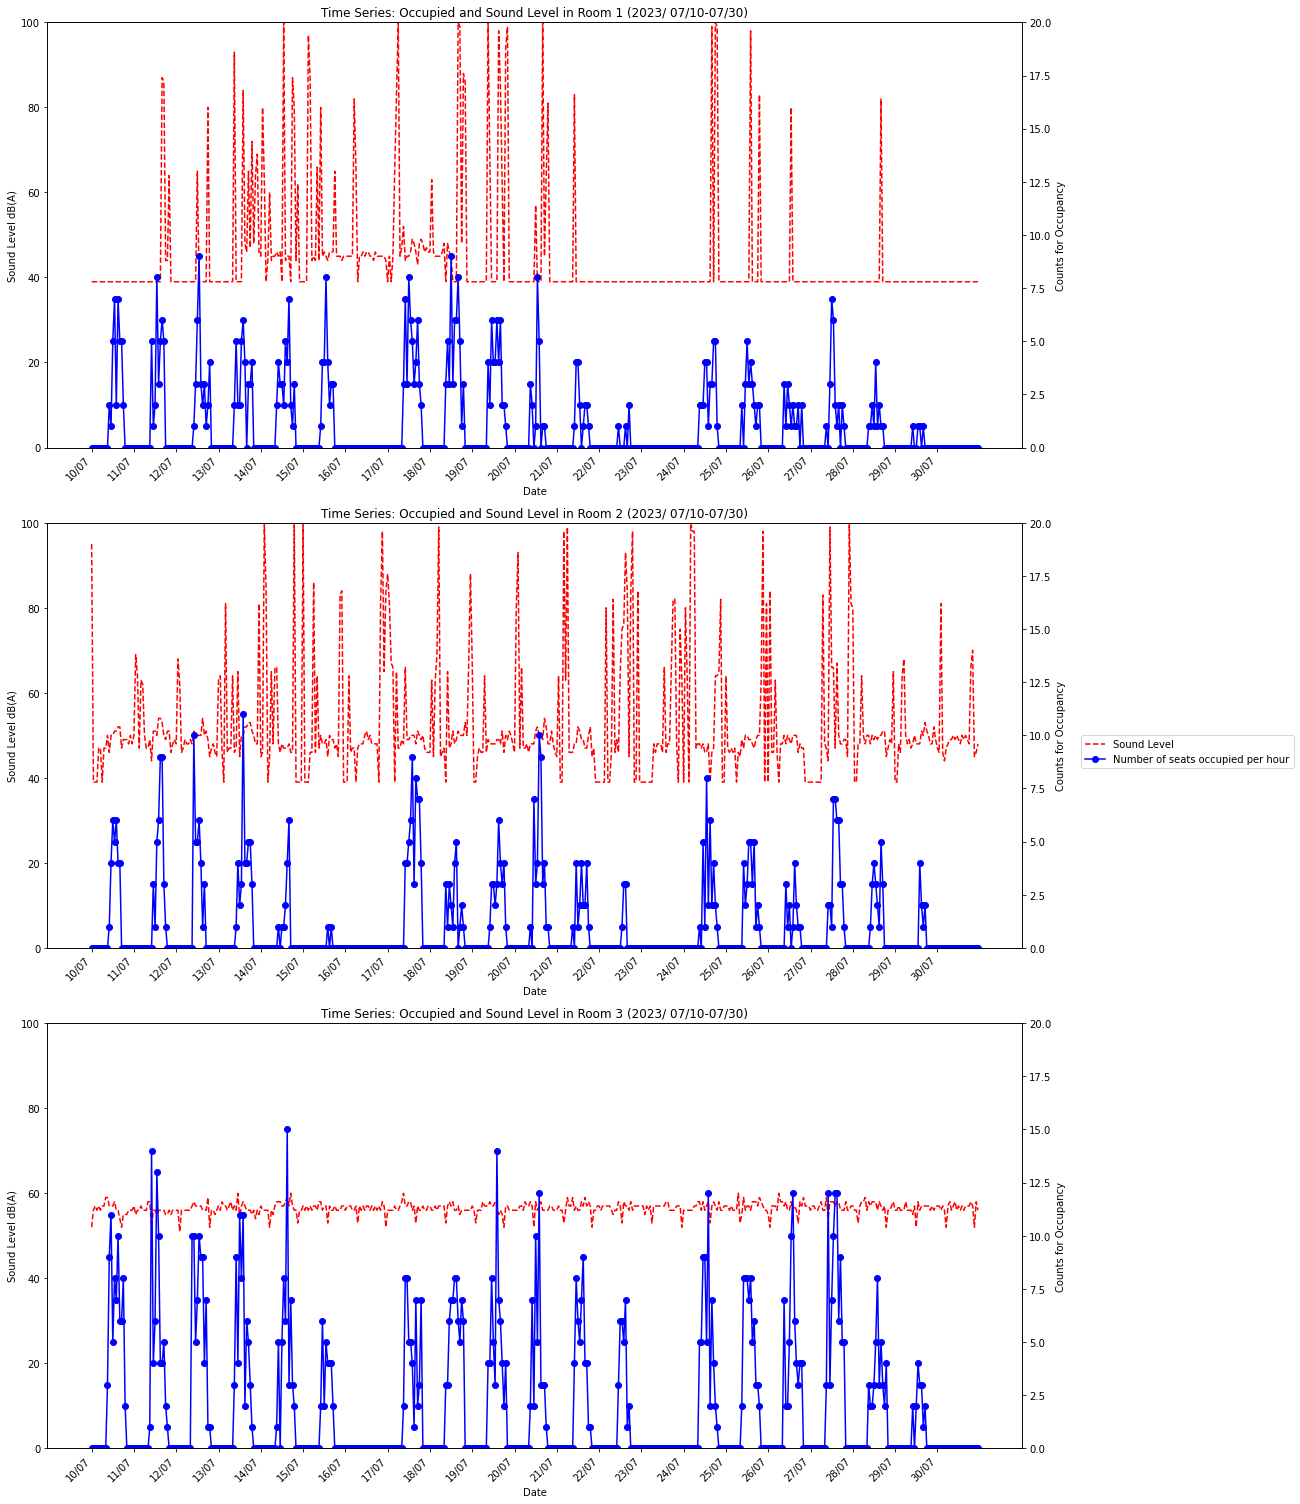

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件
data = pd.read_csv("merged_data_filled_zhong.csv")

# 将 'date' 列转化为时间格式，并指定正确的格式
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# 按 'date' 列排序，确保数据是按时间顺序排列的
data = data.sort_values(by='date')

# 设置房间的显示顺序
rooms = [1, 2, 3]

# 创建主图
fig = plt.figure(figsize=(15, 7 * len(rooms)))

# 为每个房间创建一个子图
for idx, room in enumerate(rooms, 1):
    room_data = data[data['room'] == room]
    
    # 计算x轴刻度
    x_ticks = room_data['date'][::24]  # 每24个时间点显示一个
    x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]

    # 创建子图
    ax = fig.add_subplot(len(rooms), 1, idx)

    # 设置左边y轴
    ax.set_ylabel("Sound Level dB(A)")
    ax.set_ylim(0, 100)
    ax.plot(room_data['date'], room_data['Value'], label='Sound Level', color='red', linestyle='--')

    # 设置右边y轴
    ax2 = ax.twinx()
    ax2.plot(room_data['date'], room_data['count_1s'], label='Number of seats occupied per hour', color='blue', marker='o')
    ax2.set_ylabel("Counts for Occupancy")
    ax2.set_ylim(0, 20)

    # 设置子图的标题和轴标签
    ax.set_title(f"Time Series: Occupied and Sound Level in Room {room} (2023/ 07/10-07/30)")
    ax.set_xlabel("Date")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')

# 调整子图的间距
plt.subplots_adjust(hspace=0.5)

# 创建图例
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = fig.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1, 0.5))

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('Time Series: Occupied and Sound Level in Room_hou.png', bbox_extra_artists=(legend,), bbox_inches='tight')

# 显示图形
plt.show()


In [87]:
import pandas as pd

# 读取csv文件
data = pd.read_csv("merged_data_filled_qian.csv")

# 计算统计数据
statistics = {
    'Occupancy': {
        'Mean': data['count_1s'].mean(),
        'Median': data['count_1s'].median(),
        'Mode': data['count_1s'].mode()[0],
        'Range': data['count_1s'].max() - data['count_1s'].min(),
        'Variance': data['count_1s'].var(),
        'Standard Deviation': data['count_1s'].std(),
    },
    'Sound Level': {
        'Mean': data['Value'].mean(),
        'Median': data['Value'].median(),
        'Mode': data['Value'].mode()[0],
        'Range': data['Value'].max() - data['Value'].min(),
        'Variance': data['Value'].var(),
        'Standard Deviation': data['Value'].std(),
    },
    'Covariance': {
        'Between Occupancy and Sound Level': data[['count_1s', 'Value']].cov().iloc[0, 1]
    }
}

# 转换字典为DataFrame
df_statistics = pd.DataFrame(statistics)

# 保存为csv文件
df_statistics.to_csv("statistics_output.csv")

print("Statistics have been saved to 'statistics_output.csv'")


Statistics have been saved to 'statistics_output.csv'


In [88]:
import pandas as pd

# 读取csv文件
data = pd.read_csv("merged_data_filled_zhong.csv")

# 计算统计数据
statistics = {
    'Occupancy': {
        'Mean': data['count_1s'].mean(),
        'Median': data['count_1s'].median(),
        'Mode': data['count_1s'].mode()[0],
        'Range': data['count_1s'].max() - data['count_1s'].min(),
        'Variance': data['count_1s'].var(),
        'Standard Deviation': data['count_1s'].std(),
    },
    'Sound Level': {
        'Mean': data['Value'].mean(),
        'Median': data['Value'].median(),
        'Mode': data['Value'].mode()[0],
        'Range': data['Value'].max() - data['Value'].min(),
        'Variance': data['Value'].var(),
        'Standard Deviation': data['Value'].std(),
    },
    'Covariance': {
        'Between Occupancy and Sound Level': data[['count_1s', 'Value']].cov().iloc[0, 1]
    }
}

# 转换字典为DataFrame
df_statistics = pd.DataFrame(statistics)

# 保存为csv文件
df_statistics.to_csv("statistics_output_hou.csv")

print("Statistics have been saved to 'statistics_output_hou.csv'")


Statistics have been saved to 'statistics_output_hou.csv'


# 3 Nonlinear Regression

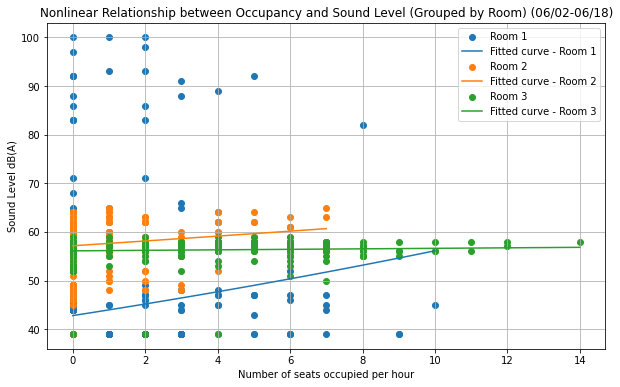

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 读取数据文件，假设使用逗号作为分隔符
data = pd.read_csv('merged_data_filled_qian.csv', delimiter=',')

# 定义指数函数模型
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# 分组并进行曲线拟合
grouped_data = data.groupby('room')
plt.figure(figsize=(10, 6))  # 设置图形大小

for room, room_data in grouped_data:
    popt, _ = curve_fit(exponential_func, room_data['count_1s'], room_data['Value'])

    # 绘制散点图
    plt.scatter(room_data['count_1s'], room_data['Value'], label=f'Room {room}')
    
    # 绘制拟合曲线
    x_fit = np.linspace(room_data['count_1s'].min(), room_data['count_1s'].max(), 100)
    y_fit = exponential_func(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fitted curve - Room {room}')

plt.xlabel('Number of seats occupied per hour')
plt.ylabel('Sound Level dB(A)')
plt.title('Nonlinear Relationship between Occupancy and Sound Level (Grouped by Room) (06/02-06/18)')
plt.legend()

plt.grid(True)
plt.savefig('Nonlinear Relationship between Occupancy and Sound Level (Grouped by Room) (06/02-06/18).png')
plt.show()

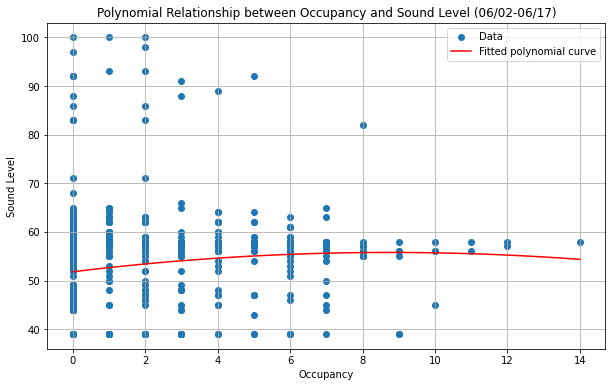

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据文件，假设使用逗号作为分隔符
data = pd.read_csv('merged_data_filled_qian.csv', delimiter=',')

# 使用numpy的polyfit方法拟合一个二次函数（可以通过更改2为其他数字来拟合更高阶的多项式）
coefficients = np.polyfit(data['count_1s'], data['Value'], 2)
polynomial = np.poly1d(coefficients)

# 创建x的值，用于绘制拟合曲线
x_fit = np.linspace(data['count_1s'].min(), data['count_1s'].max(), 100)
y_fit = polynomial(x_fit)

plt.figure(figsize=(10, 6))

# 绘制原始数据
plt.scatter(data['count_1s'], data['Value'], label='Data')

# 绘制拟合曲线
plt.plot(x_fit, y_fit, color='red', label='Fitted polynomial curve')

plt.xlabel('Occupancy')
plt.ylabel('Sound Level')
plt.title('Polynomial Relationship between Occupancy and Sound Level (06/02-06/17)')
plt.legend()

plt.grid(True)
plt.savefig('Polynomial Relationship between Occupancy and Sound Level_06.png')
plt.show()



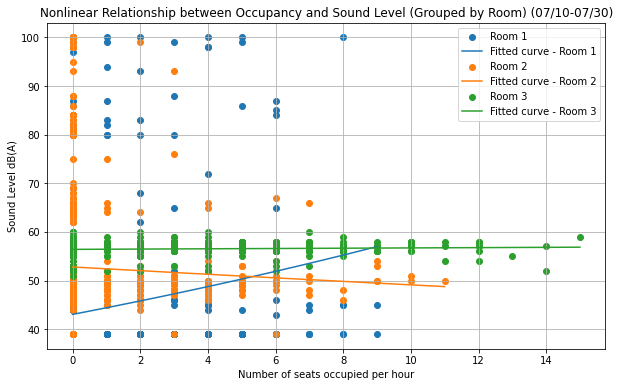

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 读取数据文件，假设使用逗号作为分隔符
data = pd.read_csv('merged_data_filled_zhong.csv', delimiter=',')

# 定义指数函数模型
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# 分组并进行曲线拟合
grouped_data = data.groupby('room')
plt.figure(figsize=(10, 6))  # 设置图形大小

for room, room_data in grouped_data:
    popt, _ = curve_fit(exponential_func, room_data['count_1s'], room_data['Value'])

    # 绘制散点图
    plt.scatter(room_data['count_1s'], room_data['Value'], label=f'Room {room}')
    
    # 绘制拟合曲线
    x_fit = np.linspace(room_data['count_1s'].min(), room_data['count_1s'].max(), 100)
    y_fit = exponential_func(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fitted curve - Room {room}')

plt.xlabel('Number of seats occupied per hour')
plt.ylabel('Sound Level dB(A)')
plt.title('Nonlinear Relationship between Occupancy and Sound Level (Grouped by Room) (07/10-07/30)')
plt.legend()
plt.grid(True)
plt.show()

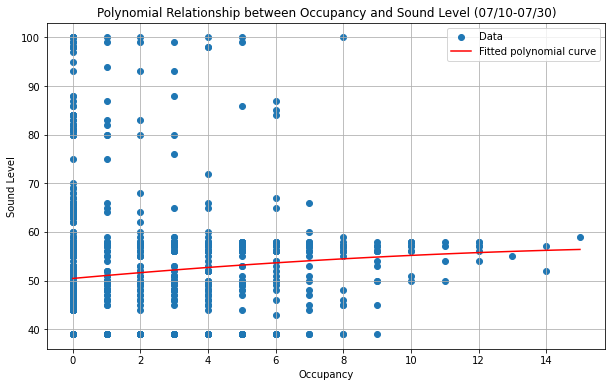

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据文件，假设使用逗号作为分隔符
data = pd.read_csv('merged_data_filled_zhong.csv', delimiter=',')

# 使用numpy的polyfit方法拟合一个二次函数（可以通过更改2为其他数字来拟合更高阶的多项式）
coefficients = np.polyfit(data['count_1s'], data['Value'], 2)
polynomial = np.poly1d(coefficients)

# 创建x的值，用于绘制拟合曲线
x_fit = np.linspace(data['count_1s'].min(), data['count_1s'].max(), 100)
y_fit = polynomial(x_fit)

plt.figure(figsize=(10, 6))

# 绘制原始数据
plt.scatter(data['count_1s'], data['Value'], label='Data')

# 绘制拟合曲线
plt.plot(x_fit, y_fit, color='red', label='Fitted polynomial curve')

plt.xlabel('Occupancy')
plt.ylabel('Sound Level')
plt.title('Polynomial Relationship between Occupancy and Sound Level (07/10-07/30)')
plt.legend()

plt.grid(True)
plt.savefig('Polynomial Relationship between Occupancy and Sound Level_07.png')
plt.show()

## 4 stationary: mean, variance, autocovariance do not depend on time

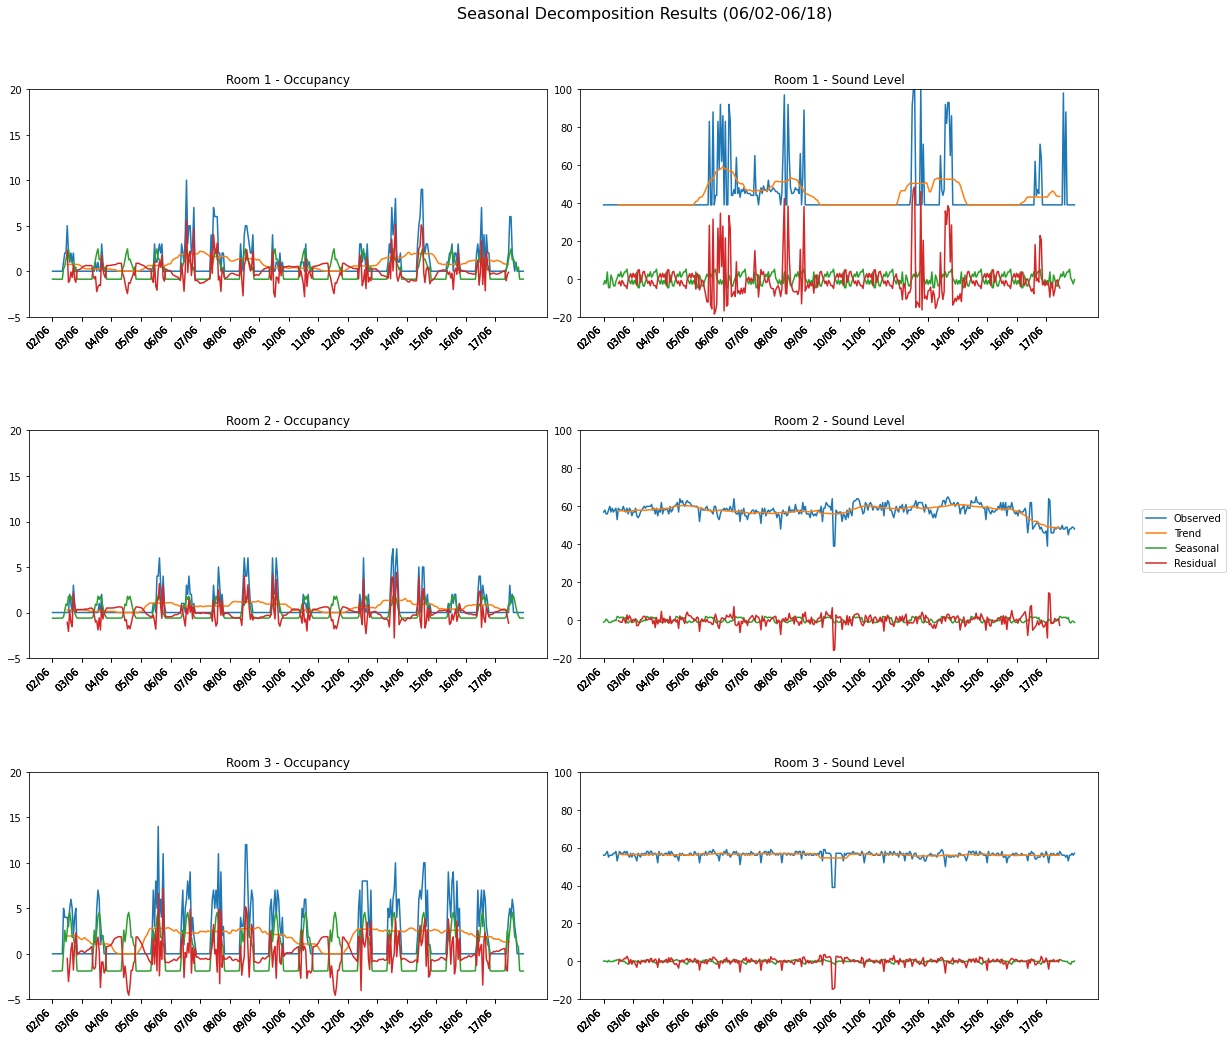

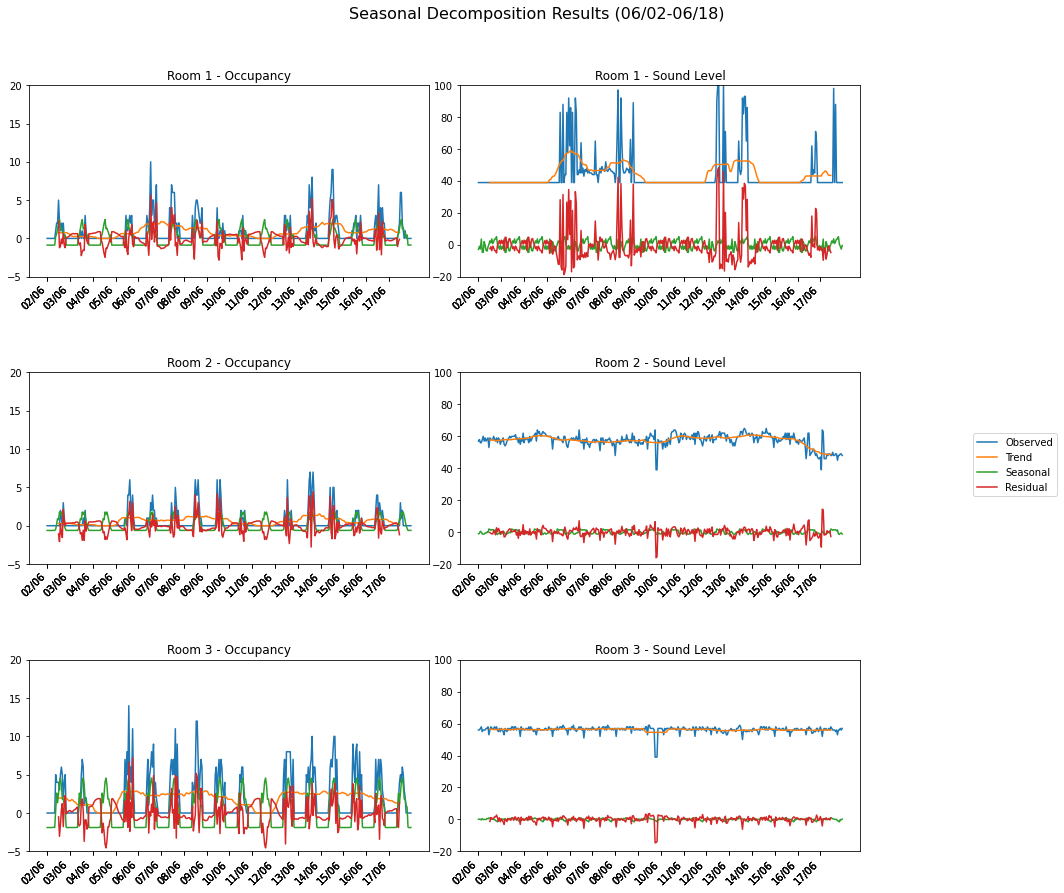

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取数据
data = pd.read_csv('merged_data_filled_qian.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')  # 根据你的日期格式进行转换

# 创建一个大的图形，其中包含3x2的子图形
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
x_ticks = data['date'][::24]  # 每24个时间点显示一个
x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]  # 只显示日期部分

# 遍历所有房间
for room_idx, room in enumerate([1, 2, 3]):
    room_data = data[data['room'] == room].set_index('date')  # 筛选房间并将date设为索引

    # 分别对count_1s和Value进行季节性分解并绘制
    for col_idx, column in enumerate(['count_1s', 'Value']):
        seasonal_data = seasonal_decompose(room_data[column], period=24)

        # 对每个季节性分解的组件进行绘图
        ax = axes[room_idx, col_idx]
        label = "Occupancy" if column == "count_1s" else "Sound Level"
        ax.set_title(f'Room {room} - {label}')
        ax.plot(seasonal_data.observed)
        ax.plot(seasonal_data.trend)
        ax.plot(seasonal_data.seasonal)
        ax.plot(seasonal_data.resid)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')  # 设置x轴的刻度和标签

        # 根据列设置y轴范围
        if column == "count_1s":
            ax.set_ylim(-5, 20)
        else:
            ax.set_ylim(-20, 100)

...

# 在所有图的右边中间位置添加图例
legend = fig.legend(['Observed', 'Trend', 'Seasonal', 'Residual'], loc='center left', bbox_to_anchor=(0.9, 0.5))

fig.suptitle('Seasonal Decomposition Results (06/02-06/18)', fontsize=16, y=1.03)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, right=0.8)

plt.savefig('Season_qian.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()



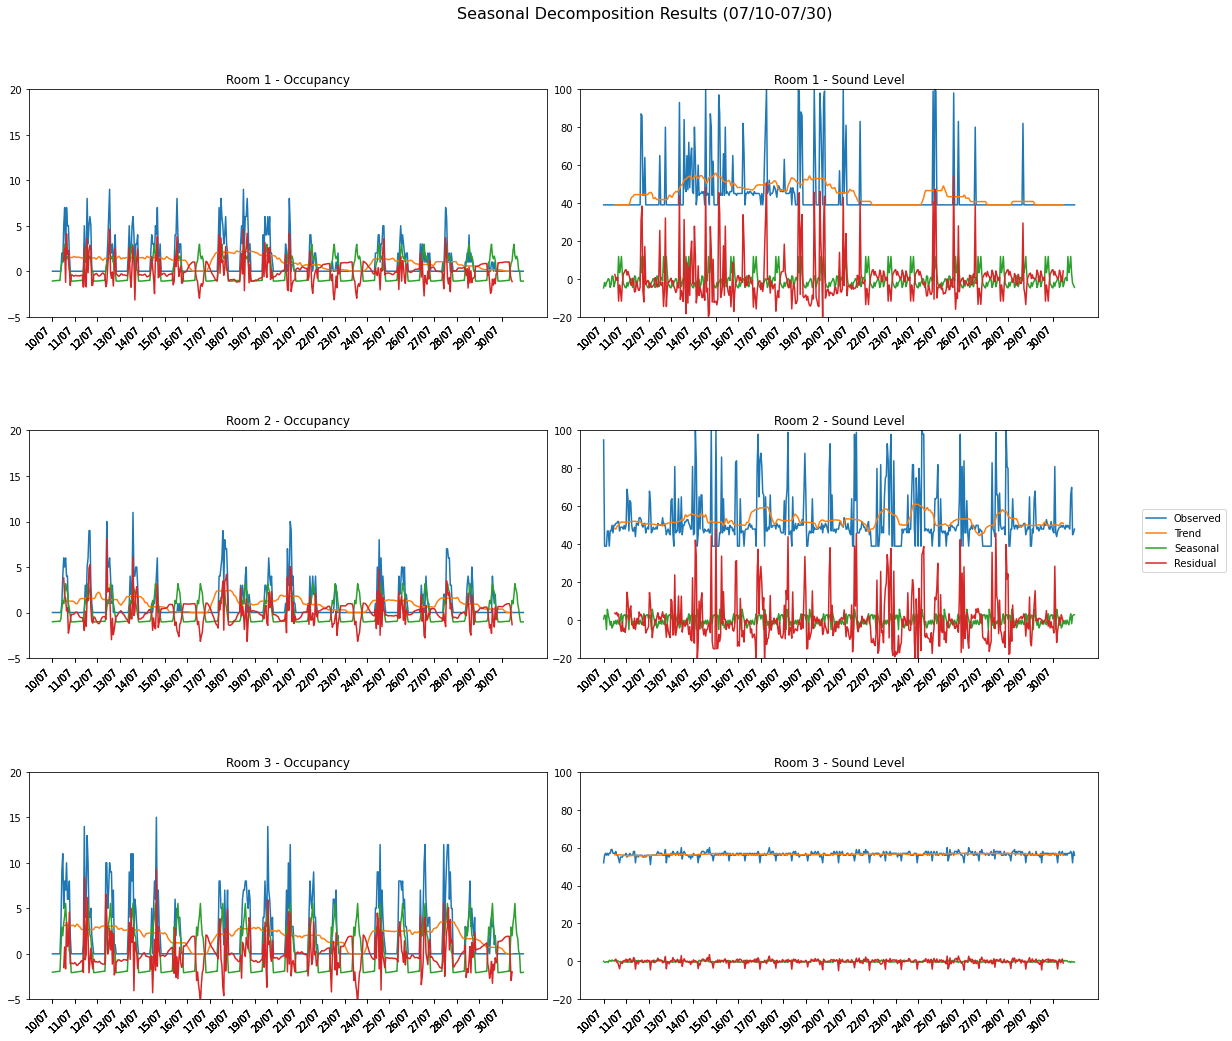

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取数据
data = pd.read_csv('merged_data_filled_zhong.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')  # 根据你的日期格式进行转换

# 创建一个大的图形，其中包含3x2的子图形
# 修改figsize为(18, 14)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
x_ticks = data['date'][::24]  # 每24个时间点显示一个
x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]  # 显示完整的日期部分

# 遍历所有房间
for room_idx, room in enumerate([1, 2, 3]):
    room_data = data[data['room'] == room].set_index('date')  # 筛选房间并将date设为索引

    # 分别对count_1s和Value进行季节性分解并绘制
    for col_idx, column in enumerate(['count_1s', 'Value']):
        seasonal_data = seasonal_decompose(room_data[column], period=24)

        # 对每个季节性分解的组件进行绘图
        ax = axes[room_idx, col_idx]
        label = "Occupancy" if column == "count_1s" else "Sound Level"
        ax.set_title(f'Room {room} - {label}')
        ax.plot(seasonal_data.observed)
        ax.plot(seasonal_data.trend)
        ax.plot(seasonal_data.seasonal)
        ax.plot(seasonal_data.resid)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')  # 设置x轴的刻度和标签

        # 根据列设置y轴范围
        if column == "count_1s":
            ax.set_ylim(-5, 20)
        else:
            ax.set_ylim(-20, 100)

# 在所有图的右边中间位置添加图例，并与提供的第二个代码块中的bbox_to_anchor保持一致
legend = fig.legend(['Observed', 'Trend', 'Seasonal', 'Residual'], loc='center left', bbox_to_anchor=(0.88, 0.5))

fig.suptitle('Seasonal Decomposition Results (07/10-07/30)', fontsize=16, y=1.03)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, right=0.85)  # 调整右侧边界以腾出更多空间

plt.savefig('Season_hou.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()



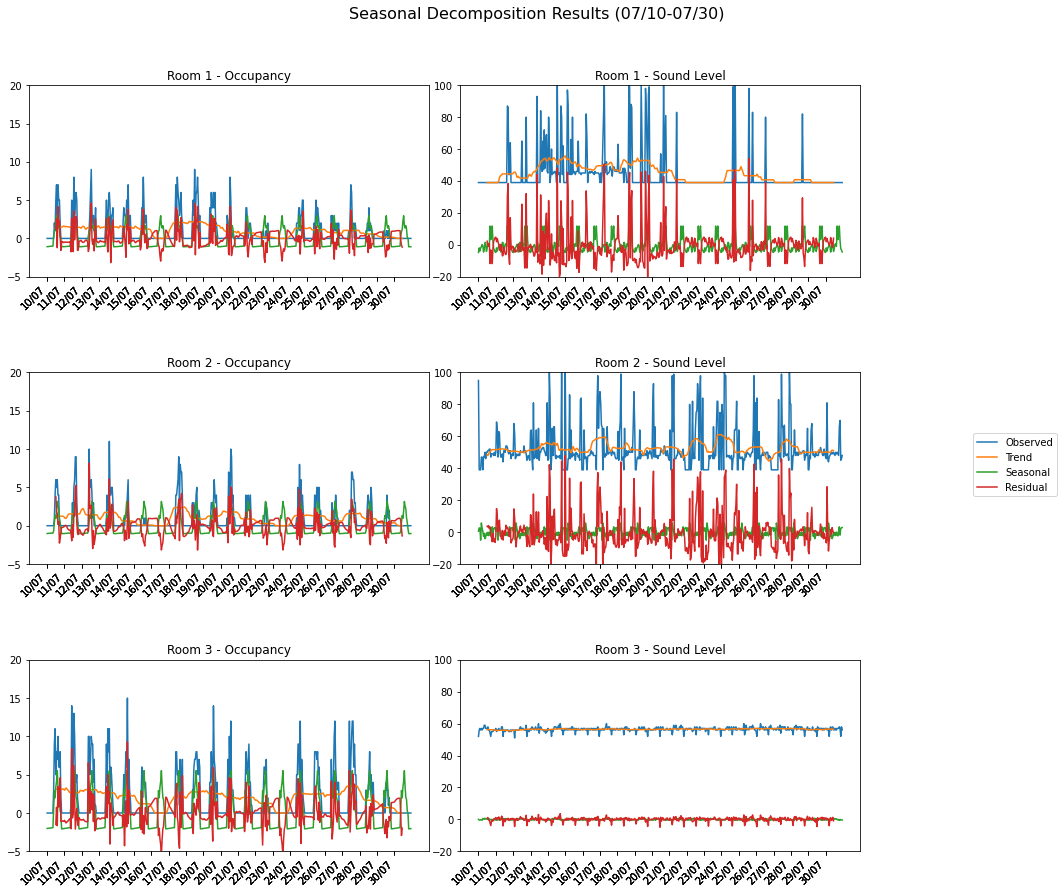

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取数据
data = pd.read_csv('merged_data_filled_zhong.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')  # 根据你的日期格式进行转换

# 创建一个大的图形，其中包含3x2的子图形
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
x_ticks = data['date'][::24]  # 每24个时间点显示一个
x_tick_labels = [tick.strftime('%d/%m') for tick in x_ticks]  # 只显示日期部分

# 遍历所有房间
for room_idx, room in enumerate([1, 2, 3]):
    room_data = data[data['room'] == room].set_index('date')  # 筛选房间并将date设为索引

    # 分别对count_1s和Value进行季节性分解并绘制
    for col_idx, column in enumerate(['count_1s', 'Value']):
        seasonal_data = seasonal_decompose(room_data[column], period=24)

        # 对每个季节性分解的组件进行绘图
        ax = axes[room_idx, col_idx]
        label = "Occupancy" if column == "count_1s" else "Sound Level"
        ax.set_title(f'Room {room} - {label}')
        ax.plot(seasonal_data.observed)
        ax.plot(seasonal_data.trend)
        ax.plot(seasonal_data.seasonal)
        ax.plot(seasonal_data.resid)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')  # 设置x轴的刻度和标签

        # 根据列设置y轴范围
        if column == "count_1s":
            ax.set_ylim(-5, 20)
        else:
            ax.set_ylim(-20, 100)

# 在所有图的右边中间位置添加图例
...

# 在所有图的右边中间位置添加图例
legend = fig.legend(['Observed', 'Trend', 'Seasonal', 'Residual'], loc='center left', bbox_to_anchor=(0.9, 0.5))

fig.suptitle('Seasonal Decomposition Results (07/10-07/30)', fontsize=16, y=1.03)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, right=0.8)

plt.savefig('Season_hou.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()


### 4.1 ADF Test

In [115]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 读取数据
df = pd.read_csv('merged_data_filled_qian.csv')

# 要测试的列
columns_to_test = ['count_1s', 'Value']

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=[
    'Column', 'ADF Statistic', 'p-value', 'Used lags',
    'Number of observations used', '1%', '5%', '10%'
])

for column in columns_to_test:
    # 确保列在DataFrame中
    if column in df.columns:
        result = adfuller(df[column], autolag='AIC', regression='ct')

        # 将结果保存到results_df中
        results_df = results_df.append({
            'Column': column,
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Used lags': result[2],
            'Number of observations used': result[3],
            '1%': result[4]['1%'],
            '5%': result[4]['5%'],
            '10%': result[4]['10%']
        }, ignore_index=True)
    else:
        print(f"Column {column} not found in the DataFrame.")

# 导出结果到CSV
results_df.to_csv('adfuller_results.csv', index=False)
print("Results saved to adfuller_results.csv")


/tmp/ipykernel_65/508331933.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Results saved to adfuller_results.csv


/tmp/ipykernel_65/508331933.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [118]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 读取数据
df = pd.read_csv('merged_data_filled_zhong.csv')

# 要测试的列
columns_to_test = ['count_1s', 'Value']

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=[
    'Column', 'ADF Statistic', 'p-value', 'Used lags',
    'Number of observations used', '1%', '5%', '10%'
])

for column in columns_to_test:
    # 确保列在DataFrame中
    if column in df.columns:
        result = adfuller(df[column], autolag='AIC', regression='ct')

        # 将结果保存到results_df中
        results_df = results_df.append({
            'Column': column,
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Used lags': result[2],
            'Number of observations used': result[3],
            '1%': result[4]['1%'],
            '5%': result[4]['5%'],
            '10%': result[4]['10%']
        }, ignore_index=True)
    else:
        print(f"Column {column} not found in the DataFrame.")

# 导出结果到CSV
results_df.to_csv('adfuller_results_hou.csv', index=False)
print("Results saved to adfuller_results_hou.csv")


Results saved to adfuller_results_hou.csv


/tmp/ipykernel_65/3240920260.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_65/3240920260.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [121]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 读取数据
df = pd.read_csv('merged_data_filled_hou.csv')

# 要测试的列
columns_to_test = ['count_1s', 'Value']

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=[
    'Column', 'ADF Statistic', 'p-value', 'Used lags',
    'Number of observations used', '1%', '5%', '10%'
])

for column in columns_to_test:
    # 确保列在DataFrame中
    if column in df.columns:
        result = adfuller(df[column], autolag='AIC', regression='ct')

        # 将结果保存到results_df中
        results_df = results_df.append({
            'Column': column,
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Used lags': result[2],
            'Number of observations used': result[3],
            '1%': result[4]['1%'],
            '5%': result[4]['5%'],
            '10%': result[4]['10%']
        }, ignore_index=True)
    else:
        print(f"Column {column} not found in the DataFrame.")

# 导出结果到CSV
results_df.to_csv('adfuller_results_zhongjian.csv', index=False)
print("Results saved to adfuller_results_zhongjian.csv")


Results saved to adfuller_results_zhongjian.csv


/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/tmp/ipykernel_65/2006671706.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_65/2006671706.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [13]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#white noise

In [116]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    series = df[column]
    result = acorr_ljungbox(series, lags=1)
    print(f"Result for column {column}: {result}")

Result for column no:        lb_stat      lb_pvalue
1  1148.994801  7.419131e-252
Result for column room:        lb_stat      lb_pvalue
1  1148.994801  7.419131e-252
Result for column count_1s:       lb_stat      lb_pvalue
1  528.636555  5.592094e-117
Result for column Value:       lb_stat      lb_pvalue
1  464.007344  6.454048e-103


In [117]:
import pandas as pd

# Data from your results
data = {
    "Column": ["no", "room", "count_1s", "Value"],
    "Ljung-Box Statistic": [1148.994801, 1148.994801, 528.636555, 464.007344],
    "P-value": [7.419131e-252, 7.419131e-252, 5.592094e-117, 6.454048e-103]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Export the table to a CSV file
results_df.to_csv("results_table.csv", index=False)

# Export the table to an Excel file
# Make sure you have openpyxl installed to export to Excel
results_df.to_excel("results_table.xlsx", index=False)


In [95]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 读取数据
df = pd.read_csv('merged_data_filled_zhong.csv')

# 要测试的列
columns_to_test = ['count_1s', 'Value']

for column in columns_to_test:
    # 确保列在DataFrame中
    if column in df.columns:
        result = adfuller(df[column], autolag='AIC', regression='ct')
        
        print(f'Results for {column}:')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Used lags: %i' % result[2])
        print('Number of observations used: %i' % result[3])
        print('Critical values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print()
    else:
        print(f"Column {column} not found in the DataFrame.")

Results for count_1s:
ADF Statistic: -3.799009
p-value: 0.016611
Used lags: 23
Number of observations used: 1488
Critical values:
	1%: -3.965
	5%: -3.413
	10%: -3.129

Results for Value:
ADF Statistic: -12.791578
p-value: 0.000000
Used lags: 4
Number of observations used: 1507
Critical values:
	1%: -3.965
	5%: -3.413
	10%: -3.129



In [ ]:
# white noise

In [122]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    series = df[column]
    result = acorr_ljungbox(series, lags=1)
    print(f"Result for column {column}: {result}")


Result for column no:        lb_stat  lb_pvalue
1  1580.996217        0.0
Result for column room:        lb_stat  lb_pvalue
1  1580.996217        0.0
Result for column count_1s:    lb_stat  lb_pvalue
1      NaN        NaN
Result for column Value:       lb_stat     lb_pvalue
1  245.089073  3.055679e-55


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [120]:
import pandas as pd

# Given results data
data = {
    "Column": ["no", "room", "count_1s", "Value"],
    "Ljung-Box Statistic": [1508.996037, 1508.996037, 731.604883, 223.067433],
    "P-value": [0.0, 0.0, 4.010776e-161, 1.937844e-50]
}

# Create DataFrame from the data
results_df = pd.DataFrame(data)

# Export the table to a CSV file
results_df.to_csv("new_results_table.csv", index=False)

# Export the table to an Excel file (Ensure you have openpyxl installed)
results_df.to_excel("new_results_table.xlsx", index=False)


# 5 Forecasting

## 5.1 Cross-Correlation

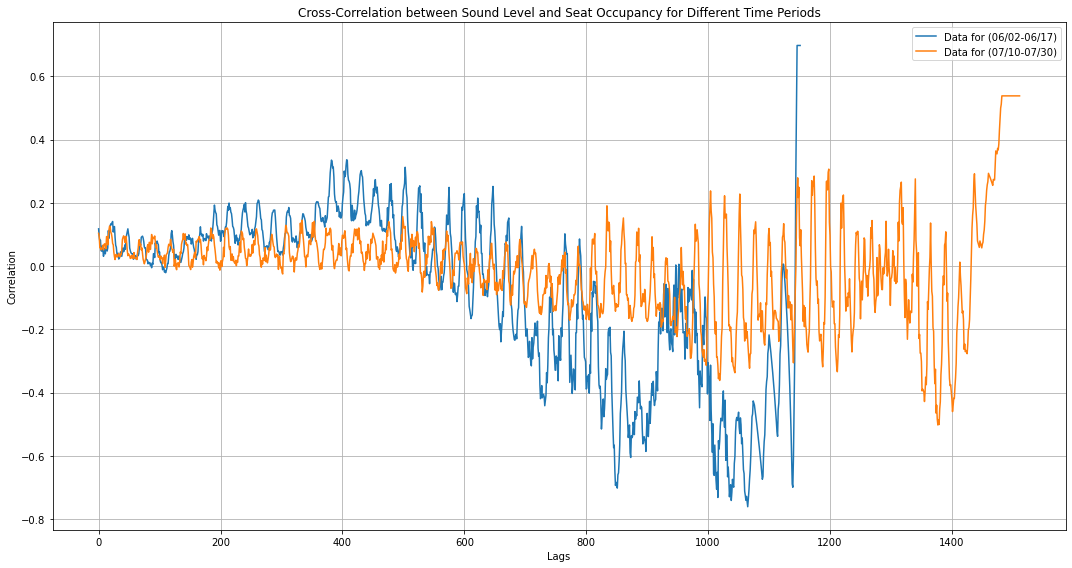

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# 读取两个数据文件
data_qian = pd.read_csv("merged_data_filled_qian.csv", parse_dates=['date'])
data_zhong = pd.read_csv("merged_data_filled_zhong.csv", parse_dates=['date'])

# 设定日期为索引
data_qian.set_index('date', inplace=True)
data_zhong.set_index('date', inplace=True)

plt.figure(figsize=(15, 8))

# 计算第一个数据文件的cross-correlation并绘图
lag_correlation_qian = ccf(data_qian['count_1s'], data_qian['Value'])
plt.plot(lag_correlation_qian, label="Data for (06/02-06/17)")

# 计算第二个数据文件的cross-correlation并绘图
lag_correlation_zhong = ccf(data_zhong['count_1s'], data_zhong['Value'])
plt.plot(lag_correlation_zhong, label="Data for (07/10-07/30)")

# 添加图例、标题和标签等信息
plt.legend()
plt.title("Cross-Correlation between Sound Level and Seat Occupancy for Different Time Periods")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.savefig('Cross-Correlation between Sound Level and Seat Occupancy for Different Time Period.png')
plt.show()


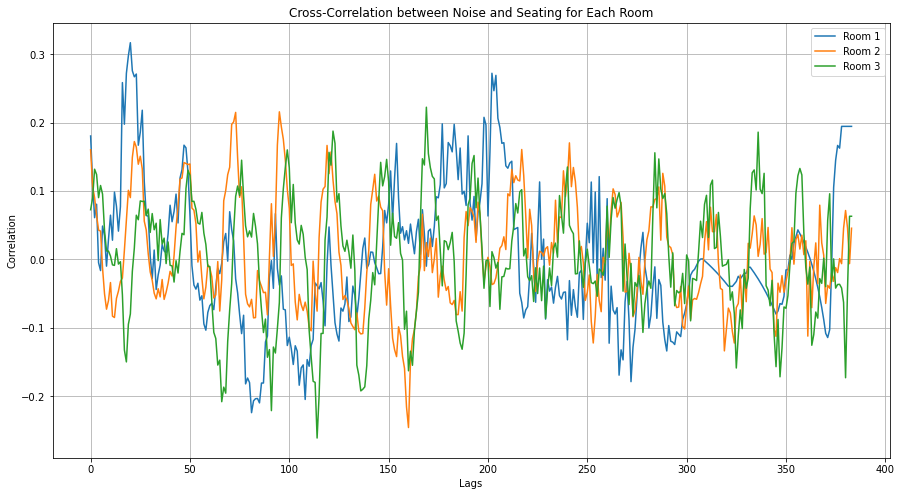

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# 读取数据
data = pd.read_csv("merged_data_filled_qian.csv", parse_dates=['date'])
data.set_index('date', inplace=True)

# 获取所有房间号
rooms = data['room'].unique()

plt.figure(figsize=(15, 8))

for room in rooms:
    room_data = data[data['room'] == room]
    lag_correlation = ccf(room_data['count_1s'], room_data['Value'])

    # 绘制每个房间的滞后相关性
    plt.plot(lag_correlation, label=f"Room {room}")

plt.legend()
plt.title("Cross-Correlation between Noise and Seating for Each Room")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

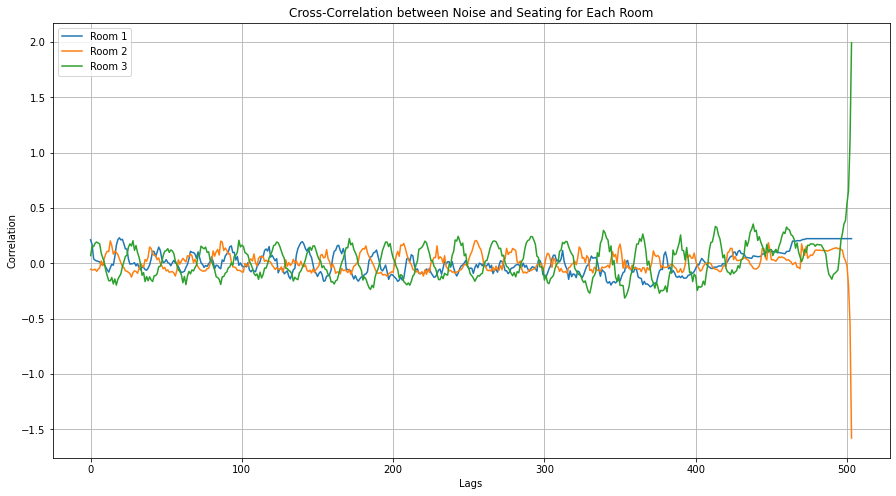

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# 读取数据
data = pd.read_csv("merged_data_filled_zhong.csv", parse_dates=['date'])
data.set_index('date', inplace=True)

# 获取所有房间号
rooms = data['room'].unique()

plt.figure(figsize=(15, 8))

for room in rooms:
    room_data = data[data['room'] == room]
    lag_correlation = ccf(room_data['count_1s'], room_data['Value'])

    # 绘制每个房间的滞后相关性
    plt.plot(lag_correlation, label=f"Room {room}")

plt.legend()
plt.title("Cross-Correlation between Noise and Seating for Each Room")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

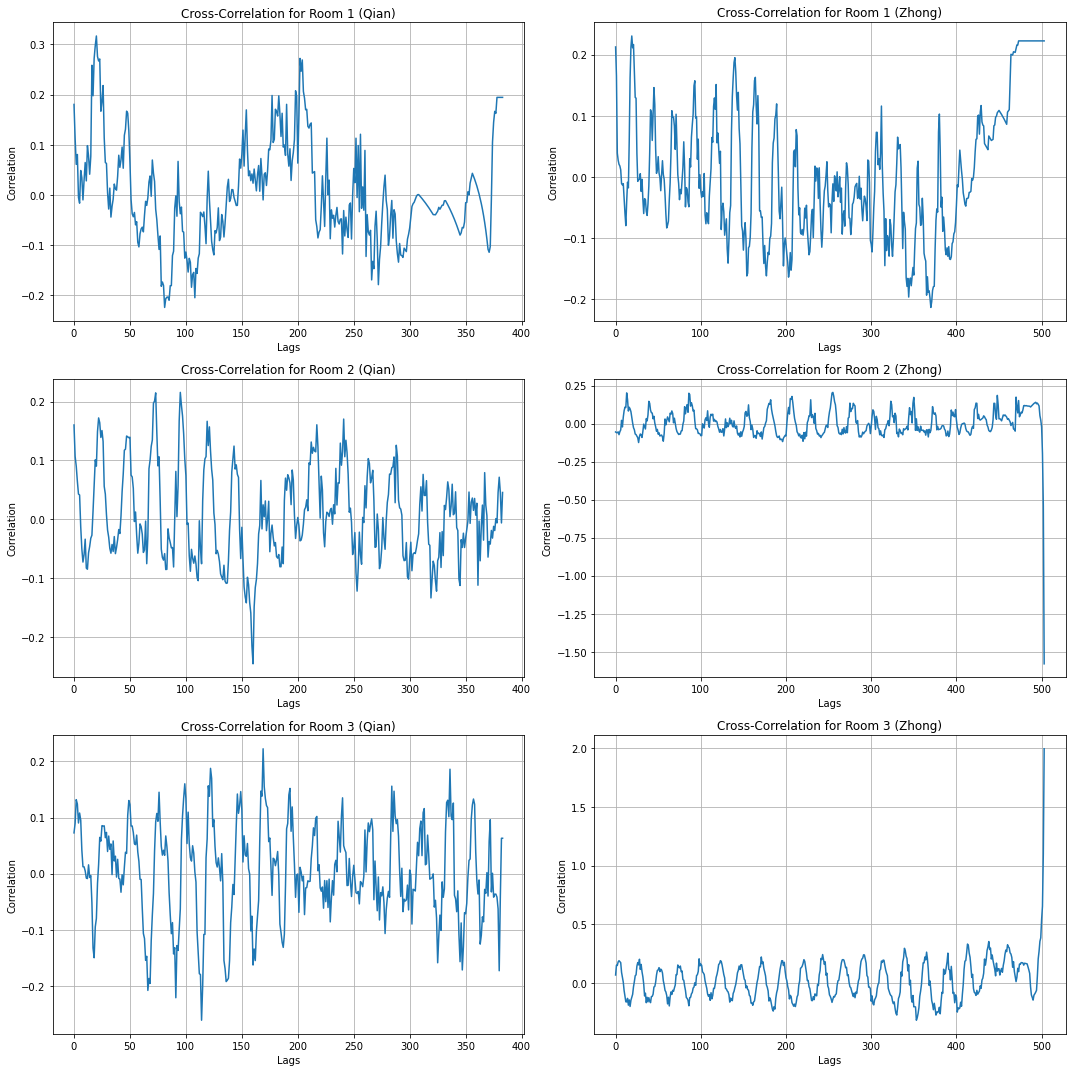

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# 读取两份数据
data_qian = pd.read_csv("merged_data_filled_qian.csv", parse_dates=['date'])
data_zhong = pd.read_csv("merged_data_filled_zhong.csv", parse_dates=['date'])

data_qian.set_index('date', inplace=True)
data_zhong.set_index('date', inplace=True)

rooms = data_qian['room'].unique()

# 创建3x2的子图结构
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 初始化两个空的DataFrames
df_qian = None
df_zhong = None

for idx, room in enumerate(rooms):
    room_data_qian = data_qian[data_qian['room'] == room]
    room_data_zhong = data_zhong[data_zhong['room'] == room]

    lag_correlation_qian = ccf(room_data_qian['count_1s'], room_data_qian['Value'])
    lag_correlation_zhong = ccf(room_data_zhong['count_1s'], room_data_zhong['Value'])

    if df_qian is None:  # 初始化DataFrames在第一次循环中
        df_qian = pd.DataFrame({'Lag': range(len(lag_correlation_qian))})
        df_zhong = pd.DataFrame({'Lag': range(len(lag_correlation_zhong))})

    # 添加房间数据到DataFrame中
    df_qian[f'Room_{room}'] = lag_correlation_qian
    df_zhong[f'Room_{room}'] = lag_correlation_zhong

    # 绘制qian数据的滞后相关性图
    axs[idx, 0].plot(lag_correlation_qian)
    axs[idx, 0].set_title(f"Cross-Correlation for Room {room} (Qian)")
    axs[idx, 0].set_xlabel("Lags")
    axs[idx, 0].set_ylabel("Correlation")
    axs[idx, 0].grid(True)

    # 绘制zhong数据的滞后相关性图
    axs[idx, 1].plot(lag_correlation_zhong)
    axs[idx, 1].set_title(f"Cross-Correlation for Room {room} (Zhong)")
    axs[idx, 1].set_xlabel("Lags")
    axs[idx, 1].set_ylabel("Correlation")
    axs[idx, 1].grid(True)

# 保存DataFrames到Excel文件
with pd.ExcelWriter('lag_correlations.xlsx') as writer:
    df_qian.to_excel(writer, sheet_name='Correlation_Qian', index=False)
    df_zhong.to_excel(writer, sheet_name='Correlation_Zhong', index=False)

plt.tight_layout()
plt.show()


In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 5.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 10.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 M

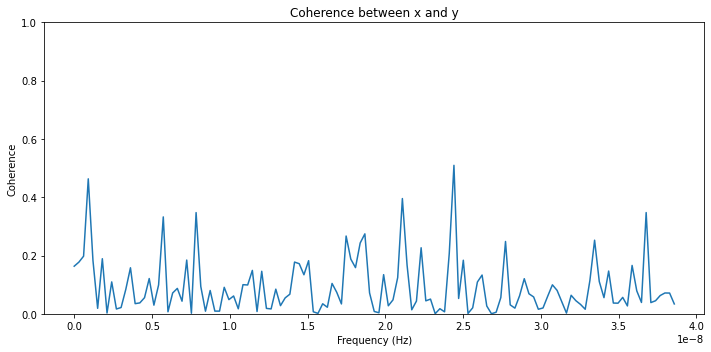

In [100]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence

# Load data
data = pd.read_csv('merged_data_filled_zhong.csv')
x = data['count_1s'].values
y = data['Value'].values

# Sampling frequency
fs = 1/3600  # hourly data, so sampling frequency is 1/3600 Hz

# Compute the coherence
frequencies, Cxy = coherence(x, y, fs=fs, nperseg=min(256, len(x)))

# Convert normalized frequencies to Hz
frequencies_hz = frequencies * fs

# Plot
plt.figure(figsize=(10, 5))
plt.plot(frequencies_hz, Cxy)
plt.title('Coherence between x and y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.ylim(0, 1)  # Explicitly set y-axis limits
plt.tight_layout()
plt.show()

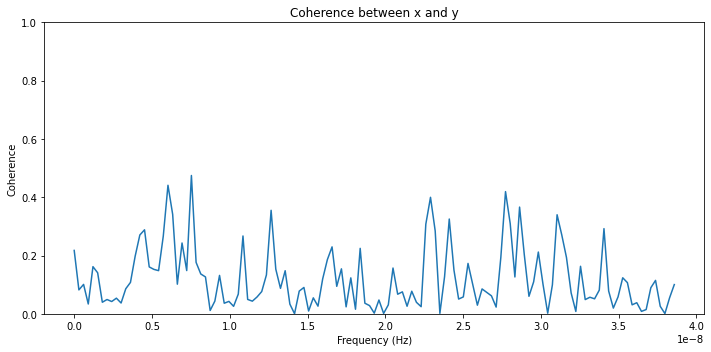

In [101]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence

# Load data
data = pd.read_csv('merged_data_filled_qian.csv')
x = data['count_1s'].values
y = data['Value'].values

# Sampling frequency
fs = 1/3600  # hourly data, so sampling frequency is 1/3600 Hz

# Compute the coherence
frequencies, Cxy = coherence(x, y, fs=fs, nperseg=min(256, len(x)))

# Convert normalized frequencies to Hz
frequencies_hz = frequencies * fs

# Plot
plt.figure(figsize=(10, 5))
plt.plot(frequencies_hz, Cxy)
plt.title('Coherence between x and y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.ylim(0, 1)  # Explicitly set y-axis limits
plt.tight_layout()
plt.show()




In [102]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target


# Set look_back to 24
look_back = 24

# 预处理数据
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# 合并数据
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)

# 创建LSTM模型
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 训练LSTM模型
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

# 预测
predicted_values_lstm = model_lstm.predict(X_test)

# LSTM模型的评估指标
mse_lstm = mean_squared_error(y_test, predicted_values_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predicted_values_lstm)
r2_lstm = r2_score(y_test, predicted_values_lstm)

print(f'LSTM Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'R-squared (R2): {r2_lstm}')


# 创建GRU模型
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# 训练GRU模型
model_gru.fit(X_train, y_train, epochs=100, batch_size=32)

# 预测
predicted_values_gru = model_gru.predict(X_test)

# GRU模型的评估指标
mse_gru = mean_squared_error(y_test, predicted_values_gru)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, predicted_values_gru)
r2_gru = r2_score(y_test, predicted_values_gru)

print(f'GRU Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Error (MAE): {mae_gru}')
print(f'R-squared (R2): {r2_gru}')


Epoch 1/100
66/66 [==============================] - 4s 14ms/step - loss: 4.1286
Epoch 2/100
66/66 [==============================] - 1s 14ms/step - loss: 2.9732
Epoch 3/100
66/66 [==============================] - 1s 17ms/step - loss: 2.4842
Epoch 4/100
66/66 [==============================] - 1s 16ms/step - loss: 2.2437
Epoch 5/100
35/66 [==============>...............] - ETA: 0s - loss: 2.3624

KeyboardInterrupt: 

In [157]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target


# Set look_back to 12
look_back = 24

# 预处理数据
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# 合并数据
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)

# 创建LSTM模型
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 训练LSTM模型
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

# 预测
predicted_values_lstm = model_lstm.predict(X_test)

# LSTM模型的评估指标
mse_lstm = mean_squared_error(y_test, predicted_values_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predicted_values_lstm)
r2_lstm = r2_score(y_test, predicted_values_lstm)

print(f'LSTM Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'R-squared (R2): {r2_lstm}')


# 创建GRU模型
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# 训练GRU模型
model_gru.fit(X_train, y_train, epochs=100, batch_size=32)

# 预测
predicted_values_gru = model_gru.predict(X_test)

# GRU模型的评估指标
mse_gru = mean_squared_error(y_test, predicted_values_gru)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, predicted_values_gru)
r2_gru = r2_score(y_test, predicted_values_gru)

print(f'GRU Model Metrics:')
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Error (MAE): {mae_gru}')
print(f'R-squared (R2): {r2_gru}')
# 将模型评估指标整合到Pandas DataFrame中



Epoch 1/100
66/66 [==============================] - 4s 15ms/step - loss: 4.1198
Epoch 2/100
66/66 [==============================] - 1s 15ms/step - loss: 2.7068
Epoch 3/100
66/66 [==============================] - 1s 14ms/step - loss: 2.4341
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 2.3482
Epoch 5/100
66/66 [==============================] - 1s 15ms/step - loss: 2.3033
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 2.2439
Epoch 7/100
66/66 [==============================] - 1s 14ms/step - loss: 2.1827
Epoch 8/100
66/66 [==============================] - 1s 16ms/step - loss: 2.2313
Epoch 9/100
66/66 [==============================] - 1s 14ms/step - loss: 2.1753
Epoch 10/100
66/66 [==============================] - 1s 15ms/step - loss: 2.1708
Epoch 11/100
66/66 [==============================] - 1s 14ms/step - loss: 2.2178
Epoch 12/100
66/66 [==============================] - 1s 15ms/step - loss: 2.1517
Epoch 13/100
66/66 [=====

In [103]:
pip install keras scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_data(data, look_back=1):
    # Data preprocessing code (same as before)
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target

# Set look_back
look_back = 24

# Data preprocessing
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# Merge data
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# Define K-fold cross-validation folds
k_folds = 5  # Assume using 5-fold cross-validation

# Create KFold object and get indices
kf = KFold(n_splits=k_folds, shuffle=False)  # shuffle=False, as your data is time-ordered
fold_indices = kf.split(scaled_features)

# Lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform K-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    # Create GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.2))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.2))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    # Make predictions on the validation set
    predicted_values_gru = model_gru.predict(X_val_fold)

    # Calculate evaluation metrics (MSE, RMSE, MAE, R2, etc.)
    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    print(f'Fold {fold+1} Metrics:')
    print(f'Mean Squared Error (MSE): {mse_fold}')
    print(f'Root Mean Squared Error (RMSE): {rmse_fold}')
    print(f'Mean Absolute Error (MAE): {mae_fold}')
    print(f'R-squared (R2): {r2_fold}')

    # Store evaluation metrics for each fold
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

# Calculate the average and standard deviation of cross-validation results
print(f'Cross-validation Metrics:')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Standard Deviation RMSE: {np.std(rmse_scores)}')
print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Standard Deviation MAE: {np.std(mae_scores)}')
print(f'Mean R-squared (R2): {np.mean(r2_scores)}')
print(f'Standard Deviation R-squared (R2): {np.std(r2_scores)}')

Epoch 1/100
66/66 [==============================] - 4s 16ms/step - loss: 6.0629
Epoch 2/100
66/66 [==============================] - 1s 13ms/step - loss: 4.8768
Epoch 3/100
66/66 [==============================] - 2s 26ms/step - loss: 3.4366
Epoch 4/100
66/66 [==============================] - 1s 21ms/step - loss: 3.1735
Epoch 5/100
66/66 [==============================] - 1s 15ms/step - loss: 3.1455
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0385
Epoch 7/100
66/66 [==============================] - 1s 19ms/step - loss: 3.1258
Epoch 8/100
66/66 [==============================] - 1s 14ms/step - loss: 3.1106
Epoch 9/100
66/66 [==============================] - 1s 13ms/step - loss: 3.1321
Epoch 10/100
66/66 [==============================] - 1s 12ms/step - loss: 3.0638
Epoch 11/100
66/66 [==============================] - 1s 12ms/step - loss: 3.1014
Epoch 12/100
66/66 [==============================] - 1s 12ms/step - loss: 3.0452
Epoch 13/100
66/66 [=====

In [163]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']

    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    target = target.values[look_back-1:]
    
    return features, target

look_back = 24
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=False)
fold_indices = kf.split(scaled_features)

# 创建一个空的DataFrame来存储交叉验证的结果
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'RMSE', 'MAE', 'R2'])

for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    # Create LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    model_lstm.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    predicted_values_lstm = model_lstm.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, predicted_values_lstm)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_lstm)
    r2_fold = r2_score(y_val_fold, predicted_values_lstm)

    # 添加这一次fold的结果到DataFrame
    results_df.loc[fold] = [fold + 1, mse_fold, rmse_fold, mae_fold, r2_fold]
    print(f"Fold {fold + 1} results added to DataFrame.")

# 保存DataFrame为CSV文件
results_df.to_csv('cross_validation_results.csv', index=False)

print("Cross-validation results saved to 'cross_validation_results.csv'.")


Epoch 1/100
66/66 [==============================] - 3s 15ms/step - loss: 6.1425
Epoch 2/100
66/66 [==============================] - 1s 17ms/step - loss: 4.4463
Epoch 3/100
66/66 [==============================] - 1s 21ms/step - loss: 3.2540
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 3.1934
Epoch 5/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0776
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0329
Epoch 7/100
66/66 [==============================] - 1s 15ms/step - loss: 3.1110
Epoch 8/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0128
Epoch 9/100
66/66 [==============================] - 1s 18ms/step - loss: 3.1295
Epoch 10/100
66/66 [==============================] - 1s 16ms/step - loss: 3.0476
Epoch 11/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0115
Epoch 12/100
66/66 [==============================] - 1s 13ms/step - loss: 2.9996
Epoch 13/100
66/66 [=====

In [167]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_data(data, look_back=1):
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']

    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    target = target.values[look_back-1:]
    
    return features, target

# Assuming you've already read the CSV files into data_qian and data_zhong
# data_qian = pd.read_csv("merged_data_filled_qian.csv")
# data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

look_back = 24
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=False)
fold_indices = kf.split(scaled_features)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Fold', 'MSE', 'RMSE', 'MAE', 'R2'])

for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.2))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.2))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    predicted_values_gru = model_gru.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    # Store the results into the DataFrame
    results_df.loc[fold] = [fold + 1, mse_fold, rmse_fold, mae_fold, r2_fold]
    print(f"Fold {fold + 1} results added to DataFrame.")

# Save the results DataFrame to a CSV file
results_df.to_csv('cross_validation_results_gru.csv', index=False)
print("Cross-validation results saved to 'cross_validation_results_gru.csv'.")


Epoch 1/100
66/66 [==============================] - 5s 15ms/step - loss: 6.0633
Epoch 2/100
66/66 [==============================] - 1s 15ms/step - loss: 5.2225
Epoch 3/100
66/66 [==============================] - 1s 13ms/step - loss: 3.4631
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 3.2035
Epoch 5/100
66/66 [==============================] - 1s 13ms/step - loss: 3.2287
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0585
Epoch 7/100
66/66 [==============================] - 1s 13ms/step - loss: 3.0612
Epoch 8/100
66/66 [==============================] - 1s 14ms/step - loss: 3.0233
Epoch 9/100
66/66 [==============================] - 1s 15ms/step - loss: 3.1517
Epoch 10/100
66/66 [==============================] - 2s 26ms/step - loss: 3.0315
Epoch 11/100
66/66 [==============================] - 2s 23ms/step - loss: 2.9717
Epoch 12/100
66/66 [==============================] - 1s 13ms/step - loss: 3.0515
Epoch 13/100
66/66 [=====

In [43]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_data(data, look_back=1):
    # Data preprocessing code (same as before)
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target


# Data preprocessing
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# Merge data
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# Load the best hyperparameters obtained from hyperparameter tuning
look_back = 24


# Assuming you have scaled your training features and created the scaler object as shown above

# Set look_back for prediction to match the training data
look_back_prediction = 24

# 创建GRU模型 for prediction

# Create GRU model
model_gru_predict = Sequential()
model_gru_predict.add(GRU(units=units, return_sequences=True, input_shape=(look_back_prediction, n_features)))  # Update look_back here
model_gru_predict.add(Dropout(0.2))
model_gru_predict.add(GRU(units=50))
model_gru_predict.add(Dropout(0.2))
model_gru_predict.add(Dense(units=1))
model_gru_predict.compile(optimizer='adam', loss='mean_squared_error')


# 预测新数据
# 读取新数据
data_hou = pd.read_csv("merged_data_filled_hou.csv")

# 预处理新数据
features_hou, target_hou = process_data(data_hou, look_back=look_back_prediction)  # Use look_back_prediction here

# Reshape features to 2D before scaling
n_samples_hou, _, _ = features_hou.shape
features_hou_reshaped = features_hou.reshape((n_samples_hou, look_back_prediction * n_features))

# Scale the new data using the previously saved scaler
scaled_features_hou = scaler.transform(features_hou_reshaped)

# Reshape the scaled features back to 3D
scaled_features_hou = scaled_features_hou.reshape((n_samples_hou, look_back_prediction, n_features))

# 预测新数据
predicted_values_gru_1_polish = model_gru_predict.predict(scaled_features_hou)

# 输出预测结果
print("Predicted_0809.csv:")
print(predicted_values_gru_1_polish)

# You can now use the 'predicted_values_gru_1' for further analysis or save it to a file as needed.

49/49 [==============================] - 1s 5ms/step
Predicted_0809.csv:
[[-0.04259095]
 [-0.03216325]
 [-0.02412541]
 ...
 [ 0.199875  ]
 [ 0.19957279]
 [ 0.19928563]]


In [44]:
# Assuming you have predicted_values_gru from the previous code
# Convert predicted_values_gru to a pandas DataFrame
predicted_values_gru_1_polish = pd.DataFrame(predicted_values_gru_1_polish, columns=['predicted_count_1s'])



# Concatenate the two DataFrames side by side
result_df = pd.concat([predicted_values_gru_1_polish], axis=1)

# Save the result DataFrame to a CSV file
result_df.to_csv("predicted_count_1s_gru_lookback24_0809.csv", index=False)

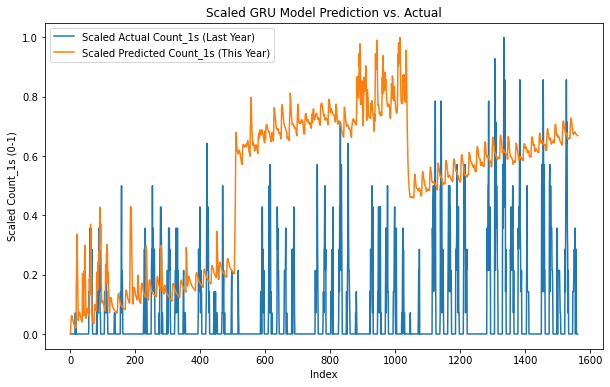

Metrics on Last Year Data:
Mean Squared Error (MSE): 0.25848086465681436
Root Mean Squared Error (RMSE): 0.5084101342979056
Mean Absolute Error (MAE): 0.4365067340367227
R-squared (R2): -10.552874663609398


In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 读取预测数据文件 predicted_count_1s_gru.csv
predicted_data = pd.read_csv('predicted_count_1s_gru_lookback24_0809.csv')

# 读取去年观测数据文件 grouped_hourly_counts_lastyear.csv
observed_data_last_year = pd.read_csv('grouped_hourly_counts_lastyear.csv')

# 获取预测数据中的 predicted_count_1s 列
predicted_values_this_year = predicted_data['predicted_count_1s'].values

# 获取去年观测数据中的 count_1s 列
observed_values_last_year = observed_data_last_year['count_1s'].values

# 使用MinMaxScaler将数据标准化到0-1范围，分别针对预测数据和去年观测数据
scaler_predicted = MinMaxScaler(feature_range=(0, 1))
scaler_observed = MinMaxScaler(feature_range=(0, 1))
scaled_predicted_values_this_year_july = scaler_predicted.fit_transform(predicted_values_this_year.reshape(-1, 1)).flatten()
scaled_observed_values_last_year = scaler_observed.fit_transform(observed_values_last_year.reshape(-1, 1)).flatten()

# 保持去年的实际数据长度等于预测数据的长度
scaled_observed_values_last_year = scaled_observed_values_last_year[:len(scaled_predicted_values_this_year_july)]

# Create an index for the x-axis (sequential numbers)
x_axis = np.arange(1, len(scaled_predicted_values_this_year_july) + 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_axis, scaled_observed_values_last_year, label='Scaled Actual Count_1s (Last Year)')
plt.plot(x_axis, scaled_predicted_values_this_year_july, label='Scaled Predicted Count_1s (This Year)')
plt.xlabel('Index')
plt.ylabel('Scaled Count_1s (0-1)')
plt.legend()
plt.title('Scaled GRU Model Prediction vs. Actual')
plt.show()

# 比较预测数据与去年观测数据的评估指标
mse = mean_squared_error(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)
rmse = np.sqrt(mse)
mae = mean_absolute_error(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)
r2 = r2_score(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)

print(f'Metrics on Last Year Data:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

In [49]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Other code and data preprocessing part remains the same.

# Define the hyperparameter combinations to try
look_back_values = [24]
units_values = [50, 100, 150]
dropout_values = [0.2, 0.3, 0.4]

# Lists to store the results
results = []

# Perform hyperparameter tuning
for look_back in look_back_values:
    for units in units_values:
        for dropout in dropout_values:
            mse_scores = []
            kf = KFold(n_splits=5, shuffle=False)
            for train_idx, val_idx in kf.split(scaled_features):
                X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
                y_train_fold, y_val_fold = target[train_idx], target[val_idx]
                
                model = Sequential()
                model.add(GRU(units=units, return_sequences=True, input_shape=(look_back, n_features)))
                model.add(Dropout(dropout))
                model.add(GRU(units=units))
                model.add(Dropout(dropout))
                model.add(Dense(units=1))
                model.compile(optimizer='adam', loss='mean_squared_error')
                
                model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
                
                predicted_values = model.predict(X_val_fold)
                mse_fold = mean_squared_error(y_val_fold, predicted_values)
                mse_scores.append(mse_fold)
            
            mean_mse = np.mean(mse_scores)
            std_mse = np.std(mse_scores)
            results.append({'look_back': look_back, 'units': units, 'dropout': dropout, 'mean_mse': mean_mse, 'std_mse': std_mse})

# Find the best hyperparameters based on mean MSE
best_result = min(results, key=lambda x: x['mean_mse'])

print(f"Best Hyperparameters: {best_result}")


17/17 [==============================] - 1s 13ms/step
Best Hyperparameters: {'look_back': 24, 'units': 50, 'dropout': 0.4, 'mean_mse': 3.2352481867720884, 'std_mse': 1.0785321020855096}


In [12]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    # Data preprocessing code (same as before)
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target

# Set look_back
look_back = 24

# Data preprocessing
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# Merge data
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# Define K-fold cross-validation folds
k_folds = 5  # Assume using 5-fold cross-validation

# Create KFold object and get indices
kf = KFold(n_splits=k_folds, shuffle=False)  # shuffle=False, as your data is time-ordered
fold_indices = kf.split(scaled_features)

# Lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform K-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]

    # Create GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.4))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.4))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    # Make predictions on the validation set
    predicted_values_gru = model_gru.predict(X_val_fold)

    # Calculate evaluation metrics (MSE, RMSE, MAE, R2, etc.)
    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    print(f'Fold {fold+1} Metrics:')
    print(f'Mean Squared Error (MSE): {mse_fold}')
    print(f'Root Mean Squared Error (RMSE): {rmse_fold}')
    print(f'Mean Absolute Error (MAE): {mae_fold}')
    print(f'R-squared (R2): {r2_fold}')

    # Store evaluation metrics for each fold
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

# Calculate the average and standard deviation of cross-validation results
print(f'Cross-validation Metrics:')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Standard Deviation RMSE: {np.std(rmse_scores)}')
print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Standard Deviation MAE: {np.std(mae_scores)}')
print(f'Mean R-squared (R2): {np.mean(r2_scores)}')
print(f'Standard Deviation R-squared (R2): {np.std(r2_scores)}')

Epoch 1/100
66/66 [==============================] - 4s 16ms/step - loss: 6.0710
Epoch 2/100
66/66 [==============================] - 1s 14ms/step - loss: 5.0870
Epoch 3/100
66/66 [==============================] - 1s 15ms/step - loss: 3.5342
Epoch 4/100
66/66 [==============================] - 1s 15ms/step - loss: 3.2876
Epoch 5/100
66/66 [==============================] - 1s 16ms/step - loss: 3.2719
Epoch 6/100
66/66 [==============================] - 1s 18ms/step - loss: 3.2338
Epoch 7/100
66/66 [==============================] - 1s 13ms/step - loss: 3.2592
Epoch 8/100
66/66 [==============================] - 1s 17ms/step - loss: 3.1067
Epoch 9/100
66/66 [==============================] - 1s 15ms/step - loss: 3.2003
Epoch 10/100
66/66 [==============================] - 1s 15ms/step - loss: 3.0314
Epoch 11/100
66/66 [==============================] - 1s 16ms/step - loss: 3.1063
Epoch 12/100
66/66 [==============================] - 1s 14ms/step - loss: 3.1450
Epoch 13/100
66/66 [=====

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.optimizers import SGD


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 读取数据
data_qian = pd.read_csv("merged_data_filled_qian.csv")
data_zhong = pd.read_csv("merged_data_filled_zhong.csv")

def process_data(data, look_back=1):
    # Data preprocessing code (same as before)
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    room_encoded = pd.get_dummies(data['room'], prefix='room')
    data = pd.concat([data, room_encoded], axis=1)
    features = data[['year', 'month', 'day', 'hour', 'Value'] + list(room_encoded.columns)]
    target = data['count_1s']
    
    # Modify features to include a window of previous time steps
    look_back_data = []
    for i in range(len(features) - look_back + 1):
        t = features.iloc[i:i+look_back].values
        look_back_data.append(t)

    features = np.array(look_back_data)
    
    target = target.values[look_back-1:]  # Adjust target to align with look_back

    return features, target

# Set look_back
look_back = 24

# Data preprocessing
features_qian, target_qian = process_data(data_qian, look_back=look_back)
features_zhong, target_zhong = process_data(data_zhong, look_back=look_back)

# Merge data
features = np.concatenate((features_qian, features_zhong))
target = np.concatenate((target_qian, target_zhong))

# Reshape the features array to 2D before applying MinMaxScaler
n_samples, look_back, n_features = features.shape
features = features.reshape((n_samples, look_back * n_features))

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Reshape the features back to 3D
scaled_features = scaled_features.reshape((n_samples, look_back, n_features))

# Define K-fold cross-validation folds
k_folds = 5  # Assume using 5-fold cross-validation

# Create KFold object and get indices
kf = KFold(n_splits=k_folds, shuffle=False)  # shuffle=False, as your data is time-ordered
fold_indices = kf.split(scaled_features)

# Lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform K-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    X_train_fold, X_val_fold = scaled_features[train_idx], scaled_features[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

    # Create GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
    model_gru.add(Dropout(0.4))
    model_gru.add(GRU(units=50))
    model_gru.add(Dropout(0.4))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer=optimizer, loss='mean_squared_error')


    # Train the model
    model_gru.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)

    # Make predictions on the validation set
    predicted_values_gru = model_gru.predict(X_val_fold)

    # Calculate evaluation metrics (MSE, RMSE, MAE, R2, etc.)
    mse_fold = mean_squared_error(y_val_fold, predicted_values_gru)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, predicted_values_gru)
    r2_fold = r2_score(y_val_fold, predicted_values_gru)

    print(f'Fold {fold+1} Metrics:')
    print(f'Mean Squared Error (MSE): {mse_fold}')
    print(f'Root Mean Squared Error (RMSE): {rmse_fold}')
    print(f'Mean Absolute Error (MAE): {mae_fold}')
    print(f'R-squared (R2): {r2_fold}')

    # Store evaluation metrics for each fold
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

# Calculate the average and standard deviation of cross-validation results
print(f'Cross-validation Metrics:')
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Standard Deviation RMSE: {np.std(rmse_scores)}')
print(f'Mean MAE: {np.mean(mae_scores)}')
print(f'Standard Deviation MAE: {np.std(mae_scores)}')
print(f'Mean R-squared (R2): {np.mean(r2_scores)}')
print(f'Standard Deviation R-squared (R2): {np.std(r2_scores)}')

2023-08-13 12:47:15.193061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 12:47:15.232217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 12:47:15.233126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 12:47:15.962507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
66/66 [==============================] - 3s 13ms/step - loss: 6.1007
Epoch 2/100
66/66 [==============================] - 1s 12ms/step - loss: 4.6255
Epoch 3/100
66/66 [==============================] - 1s 13ms/step - loss: 3.7150
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 3.5002
Epoch 5/100
66/66 [==============================] - 1s 16ms/step - loss: 3.5415
Epoch 6/100
66/66 [==============================] - 1s 14ms/step - loss: 3.5270
Epoch 7/100
66/66 [==============================] - 1s 14ms/step - loss: 3.3416
Epoch 8/100
66/66 [==============================] - 1s 13ms/step - loss: 3.3716
Epoch 9/100
66/66 [==============================] - 1s 14ms/step - loss: 3.2518
Epoch 10/100
66/66 [==============================] - 1s 13ms/step - loss: 3.4789
Epoch 11/100
66/66 [==============================] - 1s 13ms/step - loss: 3.4385
Epoch 12/100
66/66 [==============================] - 1s 17ms/step - loss: 3.2972
Epoch 13/100
66/66 [=====

In [3]:
pip install git+https://github.com/wmkouw/libTLDA


  Cloning https://github.com/wmkouw/libTLDA to /tmp/pip-req-build-bwtxu0_m
  Running command git clone --filter=blob:none --quiet https://github.com/wmkouw/libTLDA /tmp/pip-req-build-bwtxu0_m
  Resolved https://github.com/wmkouw/libTLDA to commit 0c66ec2327d191b88fca0803a7c74b0bb05afd42
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 kB 9.0 MB/s eta 0:00:00
  

In [6]:
pip install adapt-learn

ERROR: Could not find a version that satisfies the requirement adapt-learn (from versions: none)
ERROR: No matching distribution found for adapt-learn
Note: you may need to restart the kernel to use updated packages.


In [11]:
import keras.backend as K

def weighted_mean_squared_error(y_true, y_pred, sample_weight):
    return K.mean(sample_weight * K.square(y_pred - y_true), axis=-1)

def custom_loss(sample_weight):
    def loss(y_true, y_pred):
        return weighted_mean_squared_error(y_true, y_pred, sample_weight)
    return loss
def tradaboost_with_weighted_gru(trans_S, trans_A, labels_S, labels_A, test, N):
    # Initial weights
    weights_S = np.ones(trans_S.shape[0]) / trans_S.shape[0]
    weights_A = np.ones(trans_A.shape[0]) / trans_A.shape[0]
    
    models = []
    beta_list = []
    
    for i in range(N):
        # Train a GRU model with current weights
        model = Sequential()
        model.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
        model.add(Dropout(0.4))
        model.add(GRU(units=50))
        model.add(Dropout(0.4))
        model.add(Dense(units=1))
        
        optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
        model.compile(optimizer=optimizer, loss=custom_loss(np.concatenate((weights_S, weights_A))))
        
        # Combine source and auxiliary data
        combined_features = np.concatenate((trans_S, trans_A), axis=0)
        combined_labels = np.concatenate((labels_S, labels_A), axis=0)
        
        model.fit(combined_features, combined_labels, epochs=10, batch_size=32)
        
        # Predict on source data and auxiliary data
        pred_S = model.predict(trans_S).flatten()
        pred_A = model.predict(trans_A).flatten()
        
        # Compute error rates
        error_S = weights_S.dot(np.abs(pred_S - labels_S))
        error_A = weights_A.dot(np.abs(pred_A - labels_A))
        
        # Calculate beta
        beta = error_A / (1 - error_A)
        beta_list.append(beta)
        
        # Update weights for source samples
        weights_S = weights_S * np.exp(-1 * labels_S * pred_S)
        weights_S /= np.sum(weights_S)  # normalize
        
        # Update weights for auxiliary samples
        weights_A = weights_A * (beta ** (1 - np.abs(pred_A - labels_A)))
        weights_A /= np.sum(weights_A)  # normalize
        
        models.append(model)

    # Final prediction is a weighted average of predictions from each model
    final_pred = np.zeros(test.shape[0])
    for i, model in enumerate(models):
        final_pred += np.log(1 / beta_list[i]) * model.predict(test).flatten()
    
    return np.sign(final_pred)


In [13]:
def tradaboost_with_weighted_gru(trans_S, trans_A, labels_S, labels_A, test, N):
    # Initial weights
    weights_S = np.ones(trans_S.shape[0]) / trans_S.shape[0]
    weights_A = np.ones(trans_A.shape[0]) / trans_A.shape[0]
    
    models = []
    beta_list = []
    
    for i in range(N):
        # Train a GRU model with current weights
        model = Sequential()
        model.add(GRU(units=50, return_sequences=True, input_shape=(look_back, n_features)))
        model.add(Dropout(0.4))
        model.add(GRU(units=50))
        model.add(Dropout(0.4))
        model.add(Dense(units=1))
        
        # Use the Adam optimizer
        optimizer = 'adam'
        model.compile(optimizer=optimizer, loss=custom_loss(np.concatenate((weights_S, weights_A))))
        
        # Combine source and auxiliary data
        combined_features = np.concatenate((trans_S, trans_A), axis=0)
        combined_labels = np.concatenate((labels_S, labels_A), axis=0)
        
        model.fit(combined_features, combined_labels, epochs=10, batch_size=32)
        
        # Predict on source data and auxiliary data
        pred_S = model.predict(trans_S).flatten()
        pred_A = model.predict(trans_A).flatten()
        
        # Compute error rates
        error_S = weights_S.dot(np.abs(pred_S - labels_S))
        error_A = weights_A.dot(np.abs(pred_A - labels_A))
        
        # Calculate beta
        beta = error_A / (1 - error_A)
        beta_list.append(beta)
        
        # Update weights for source samples
        weights_S = weights_S * np.exp(-1 * labels_S * pred_S)
        weights_S /= np.sum(weights_S)  # normalize
        
        # Update weights for auxiliary samples
        weights_A = weights_A * (beta ** (1 - np.abs(pred_A - labels_A)))
        weights_A /= np.sum(weights_A)  # normalize
        
        models.append(model)

    # Final prediction is a weighted average of predictions from each model
    final_pred = np.zeros(test.shape[0])
    for i, model in enumerate(models):
        final_pred += np.log(1 / beta_list[i]) * model.predict(test).flatten()
    
    return np.sign(final_pred)


In [52]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load the best hyperparameters obtained from hyperparameter tuning
look_back = 24
units = 50
dropout = 0.4

# Assuming you have scaled your training features and created the scaler object as shown above

# Set look_back for prediction to match the training data
look_back_prediction = 24

# 创建GRU模型 for prediction
model_gru_predict = Sequential()
model_gru_predict.add(GRU(units=units, return_sequences=True, input_shape=(look_back_prediction, n_features)))  # Update look_back here
model_gru_predict.add(Dropout(dropout))
model_gru_predict.add(GRU(units=units))
model_gru_predict.add(Dropout(dropout))
model_gru_predict.add(Dense(units=1))
model_gru_predict.compile(optimizer='adam', loss='mean_squared_error')



# 预测新数据
# 读取新数据
data_hou = pd.read_csv("merged_data_filled_hou.csv")

# 预处理新数据
features_hou, target_hou = process_data(data_hou, look_back=look_back_prediction)  # Use look_back_prediction here

# Reshape features to 2D before scaling
n_samples_hou, _, _ = features_hou.shape
features_hou_reshaped = features_hou.reshape((n_samples_hou, look_back_prediction * n_features))

# Scale the new data using the previously saved scaler
scaled_features_hou = scaler.transform(features_hou_reshaped)

# Reshape the scaled features back to 3D
scaled_features_hou = scaled_features_hou.reshape((n_samples_hou, look_back_prediction, n_features))

# 预测新数据
predicted_values_gru_1_polish_24_50_4 = model_gru_predict.predict(scaled_features_hou)

# 输出预测结果
print("Predicted Values for count_1s in merged_data_filled_look_24_50_0.4.csv:")
print(predicted_values_gru_1_polish_24_50_4)

# You can now use the 'predicted_values_gru_1' for further analysis or save it to a file as needed.

49/49 [==============================] - 1s 4ms/step
Predicted Values for count_1s in merged_data_filled_look_24_50_0.4.csv:
[[-0.15391807]
 [-0.15306805]
 [-0.14930321]
 ...
 [ 0.04829876]
 [ 0.04724618]
 [ 0.046209  ]]


In [53]:
# Assuming you have predicted_values_gru from the previous code
# Convert predicted_values_gru to a pandas DataFrame
predicted_values_gru_1_polish_24_50_4 = pd.DataFrame(predicted_values_gru_1_polish_24_50_4, columns=['predicted_count_1s'])



# Concatenate the two DataFrames side by side
result_df_04 = pd.concat([predicted_values_gru_1_polish_24_50_4], axis=1)

# Save the result DataFrame to a CSV file
result_df_04.to_csv("predicted_count_1s_gru__24_50_04.csv", index=False)

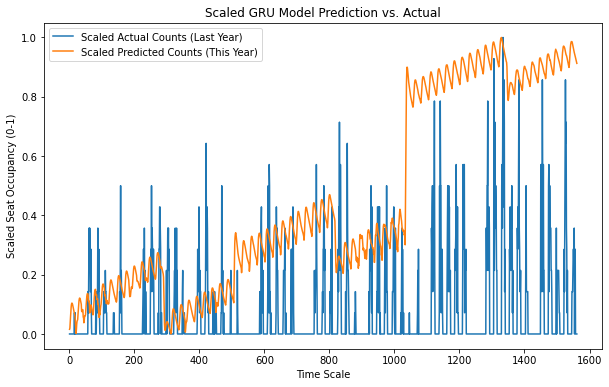

Metrics on Last Year Data:
Mean Squared Error (MSE): 0.2523171499150562
Root Mean Squared Error (RMSE): 0.5023118054705227
Mean Absolute Error (MAE): 0.3955858334676849
R-squared (R2): -10.277385706357892


In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 读取预测数据文件 predicted_count_1s_gru.csv
predicted_data = pd.read_csv('predicted_count_1s_gru__24_50_04.csv')

# 读取去年观测数据文件 grouped_hourly_counts_lastyear.csv
observed_data_last_year = pd.read_csv('grouped_hourly_counts_lastyear.csv')

# 获取预测数据中的 predicted_count_1s 列
predicted_values_this_year = predicted_data['predicted_count_1s'].values

# 获取去年观测数据中的 count_1s 列
observed_values_last_year = observed_data_last_year['count_1s'].values

# 使用MinMaxScaler将数据标准化到0-1范围，分别针对预测数据和去年观测数据
scaler_predicted = MinMaxScaler(feature_range=(0, 1))
scaler_observed = MinMaxScaler(feature_range=(0, 1))
scaled_predicted_values_this_year_july = scaler_predicted.fit_transform(predicted_values_this_year.reshape(-1, 1)).flatten()
scaled_observed_values_last_year = scaler_observed.fit_transform(observed_values_last_year.reshape(-1, 1)).flatten()

# 保持去年的实际数据长度等于预测数据的长度
scaled_observed_values_last_year = scaled_observed_values_last_year[:len(scaled_predicted_values_this_year_july)]

# Create an index for the x-axis (sequential numbers)
x_axis = np.arange(1, len(scaled_predicted_values_this_year_july) + 1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_axis, scaled_observed_values_last_year, label='Scaled Actual Counts (Last Year)')
plt.plot(x_axis, scaled_predicted_values_this_year_july, label='Scaled Predicted Counts (This Year)')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Seat Occupancy (0-1)')
plt.legend()
plt.title('Scaled GRU Model Prediction vs. Actual')
plt.savefig('prediction_vs_actual.png')

plt.show()

# 比较预测数据与去年观测数据的评估指标
mse = mean_squared_error(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)
rmse = np.sqrt(mse)
mae = mean_absolute_error(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)
r2 = r2_score(scaled_observed_values_last_year, scaled_predicted_values_this_year_july)

print(f'Metrics on Last Year Data:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

In [63]:
import scipy.stats as stats

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(scaled_observed_values_last_year, scaled_predicted_values_this_year_july.mean())

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -112.55366824151142
P-value: 0.0


In [56]:
plt.savefig('prediction_vs_actual.jpg', format='jpg', dpi=100)  # dpi指定输出图像的分辨率


<Figure size 432x288 with 0 Axes>

17/17 [==============================] - 0s 5ms/step


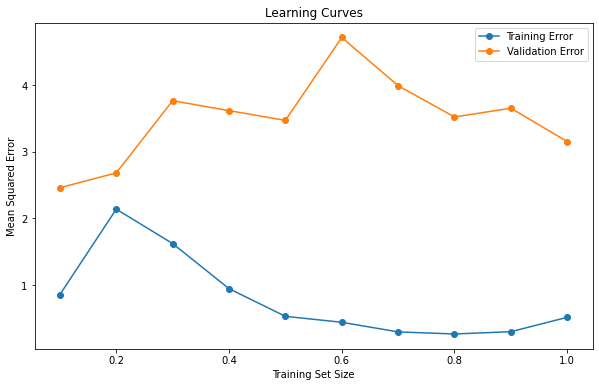

In [168]:
import matplotlib.pyplot as plt

# Assuming you're using the first fold for demonstration
train_idx, val_idx = next(kf.split(scaled_features))

train_errors, val_errors = [], []

# Define a range of training subset sizes
subset_sizes = np.linspace(0.1, 1.0, 10)  # 10%, 20%, ..., 100%

for subset_size in subset_sizes:
    subset_size_int = int(len(train_idx) * subset_size)
    subset_idx = train_idx[:subset_size_int]

    X_train_subset = scaled_features[subset_idx]
    y_train_subset = target[subset_idx]

    # Train model using the subset
    model_gru.fit(X_train_subset, y_train_subset, epochs=100, batch_size=32, verbose=0)

    # Predict and compute error on training subset and validation set
    train_pred = model_gru.predict(X_train_subset)
    train_error = mean_squared_error(y_train_subset, train_pred)
    
    val_pred = model_gru.predict(scaled_features[val_idx])
    val_error = mean_squared_error(target[val_idx], val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, '-o', label='Training Error')
plt.plot(subset_sizes, val_errors, '-o', label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curves')
plt.show()
